In [3]:
!pwd

/home/zhimin90/DePaul/CSC695/Github/CSC695-Masters-Research-on-Neural-Network-Time-Series-Attention-Models/DataExploration


In [4]:
CSV_PATH = "/home/zhimin90/DePaul/CSC695/Github/CSC695-Masters-Research-on-Neural-Network-Time-Series-Attention-Models/Asset/"

In [5]:
from sodapy import Socrata
import pandas as pd
import numpy as np
from datetime import timedelta, date
from dateutil.relativedelta import relativedelta

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("ijzp-q8t2",order="date DESC", limit=10000000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [6]:
import pickle
pickle.dump( results_df, open( CSV_PATH + "results_df.pickle", "wb" ) )

In [7]:
results_df = pickle.load(open(CSV_PATH  + 'results_df.pickle', 'rb'))

In [5]:
results_df

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,12075739,JD261456,2020-06-11T23:57:00.000,048XX W GLADYS AVE,0320,ROBBERY,STRONG ARM - NO WEAPON,STREET,False,False,...,24,25,03,1144101,1897902,2020,2020-06-18T15:48:21.000,41.875865664,-87.746381487,"{'latitude': '41.875865664', 'longitude': '-87..."
1,12076089,JD261733,2020-06-11T23:50:00.000,029XX W 85TH ST,0420,BATTERY,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,PARK PROPERTY,False,False,...,18,70,04B,1158144,1848014,2020,2020-06-18T15:48:21.000,41.738691386,-87.696178334,"{'latitude': '41.738691386', 'longitude': '-87..."
2,12075731,JD261452,2020-06-11T23:50:00.000,033XX W VAN BUREN ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,...,28,27,08B,1153994,1897824,2020,2020-06-18T15:48:21.000,41.875460231,-87.710059786,"{'latitude': '41.875460231', 'longitude': '-87..."
3,12080679,JD267112,2020-06-11T23:50:00.000,002XX W 90TH PL,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,RESIDENCE,False,True,...,21,49,26,NaN,NaN,2020,2020-06-18T15:48:21.000,NaN,NaN,NaN
4,12075706,JD261433,2020-06-11T23:50:00.000,062XX N MOZART ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,50,2,08B,1156208,1941289,2020,2020-06-18T15:48:21.000,41.994686924,-87.700753265,"{'latitude': '41.994686924', 'longitude': '-87..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7136348,9748516,HX397222,2001-01-01T00:00:00.000,031XX W DOUGLAS BLVD,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,...,24,29,17,NaN,NaN,2001,2015-08-17T15:03:40.000,NaN,NaN,NaN
7136349,9755209,HX403553,2001-01-01T00:00:00.000,031XX W DOUGLAS BLVD,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,...,24,29,17,NaN,NaN,2001,2015-08-17T15:03:40.000,NaN,NaN,NaN
7136350,11231026,JB152500,2001-01-01T00:00:00.000,050XX N ASHLAND AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,False,...,47,3,02,NaN,NaN,2001,2018-10-27T16:00:07.000,NaN,NaN,NaN
7136351,11513580,JB524424,2001-01-01T00:00:00.000,030XX W WARREN BLVD,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,...,27,27,02,NaN,NaN,2001,2020-03-21T15:44:56.000,NaN,NaN,NaN


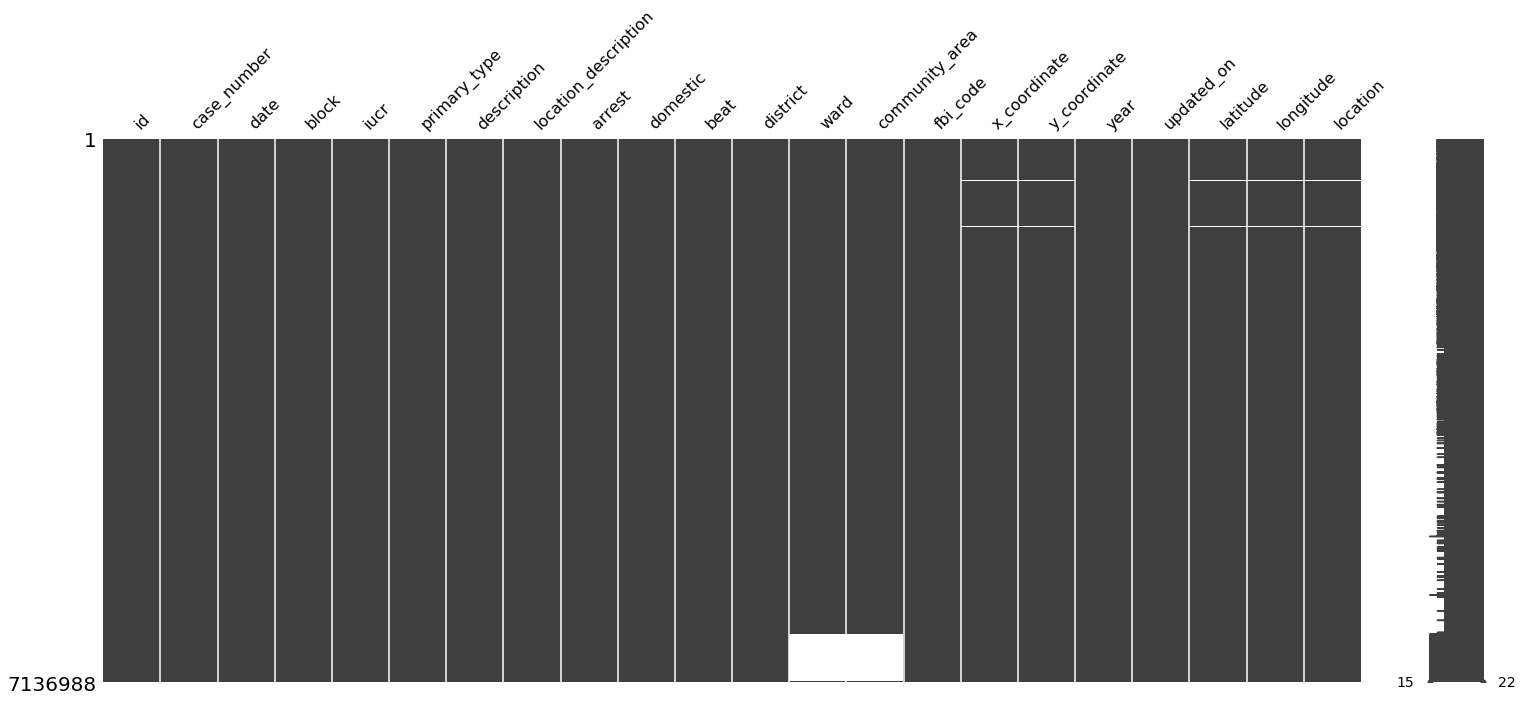

In [8]:
#plot missing variables list
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(results_df)
plt.show()

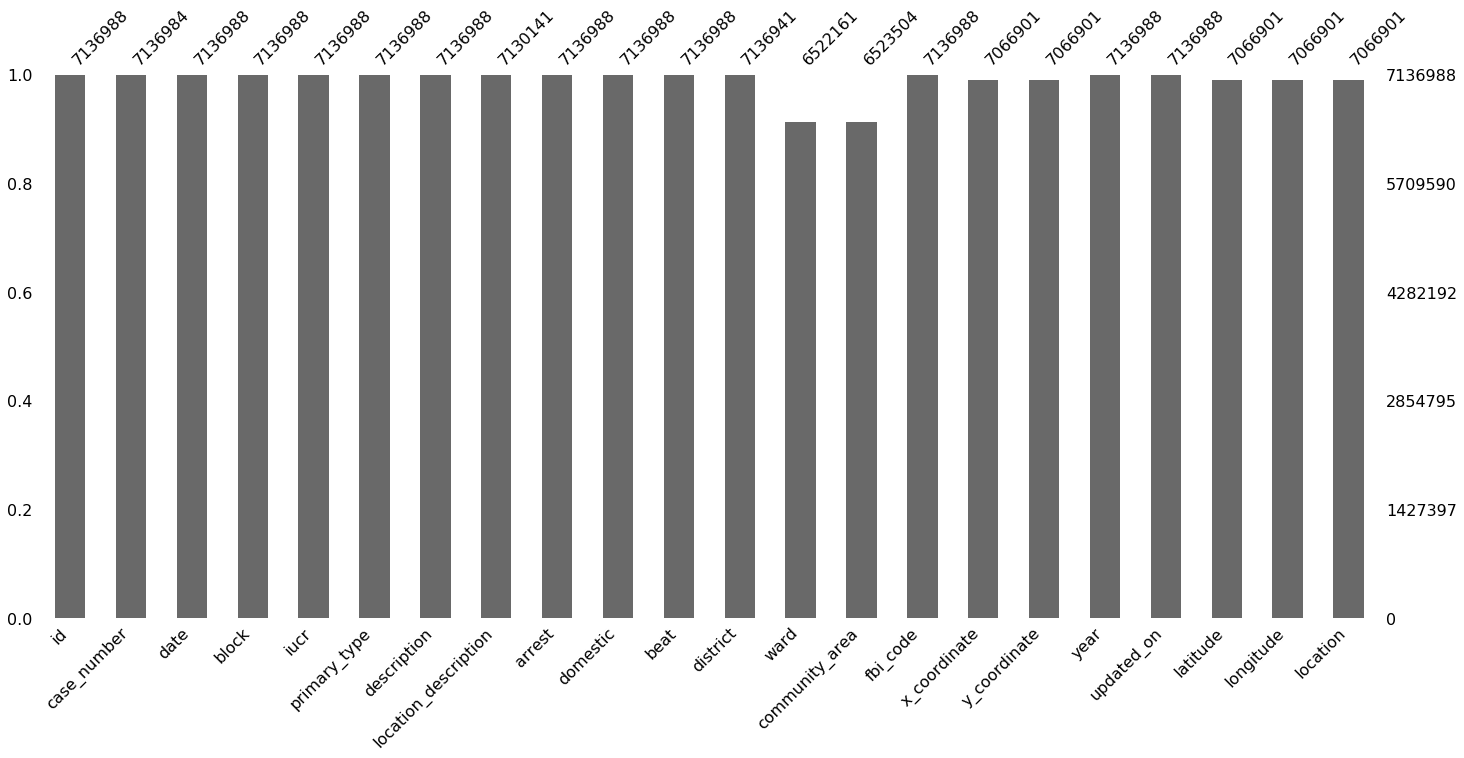

In [9]:
msno.bar(results_df) 

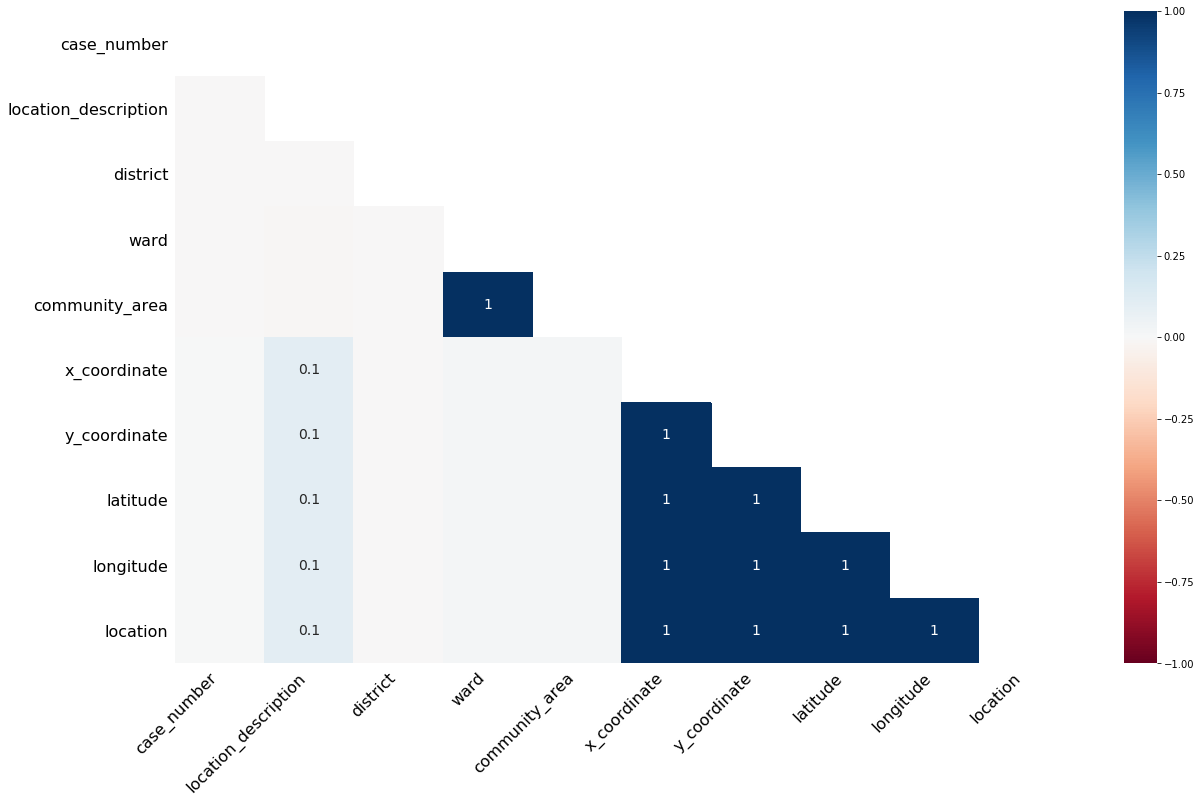

In [10]:
msno.heatmap(results_df) 

In [11]:
results_df.primary_type.value_counts()

THEFT                                1508340
BATTERY                              1306042
CRIMINAL DAMAGE                       812210
NARCOTICS                             731312
ASSAULT                               449266
OTHER OFFENSE                         443339
BURGLARY                              403274
MOTOR VEHICLE THEFT                   328306
DECEPTIVE PRACTICE                    292360
ROBBERY                               268040
CRIMINAL TRESPASS                     203172
WEAPONS VIOLATION                      80823
PROSTITUTION                           69207
PUBLIC PEACE VIOLATION                 50195
OFFENSE INVOLVING CHILDREN             49203
CRIM SEXUAL ASSAULT                    28572
SEX OFFENSE                            27137
INTERFERENCE WITH PUBLIC OFFICER       17230
GAMBLING                               14580
LIQUOR LAW VIOLATION                   14366
ARSON                                  11810
HOMICIDE                               10319
KIDNAPPING

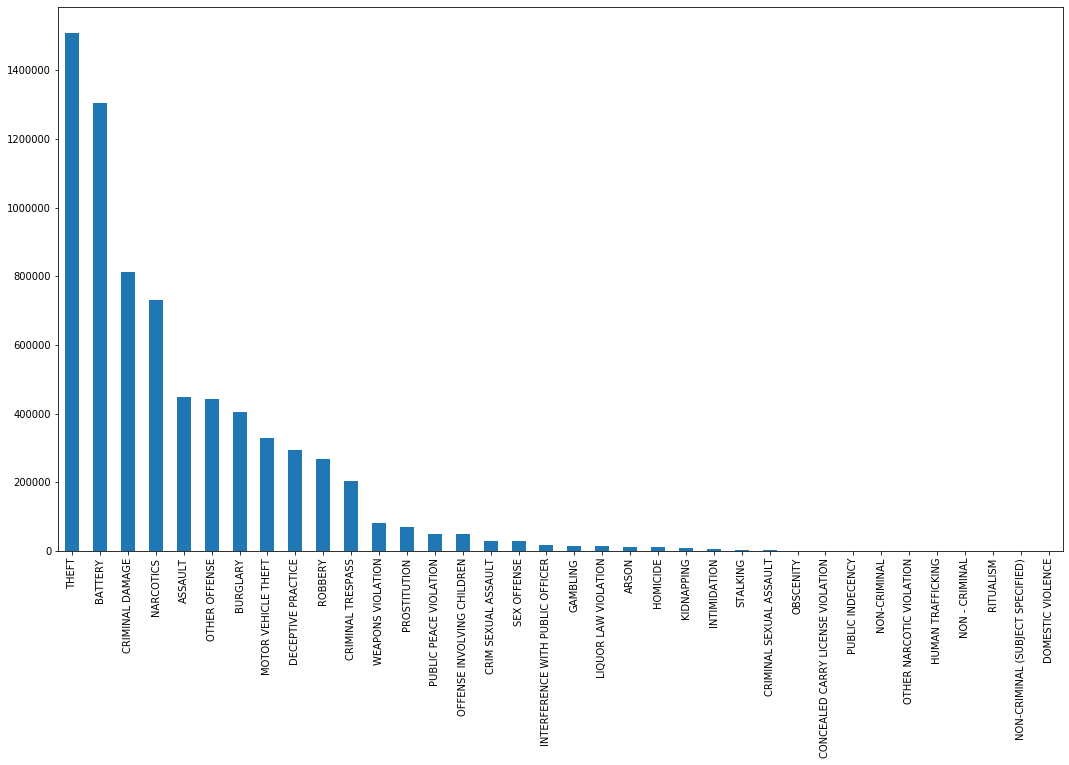

In [12]:
results_df.primary_type.value_counts().plot.bar(figsize=(18,10))

In [13]:
print(max(results_df.date))
print(min(results_df.date))

2020-06-12T23:40:00.000
2001-01-01T00:00:00.000


#### Chicago City Bound

In [14]:
xbound = (-87.9361,-87.5245)
ybound = (41.6447,42.023)

In [15]:
test_df = results_df
test_df = test_df[test_df.latitude.notna()].sort_values(['date'], ascending=[0])
test_df['date'] = pd.to_datetime(test_df['date'])
test_df['updated_on'] = pd.to_datetime(test_df['updated_on'])
test_df['latitude'] = pd.to_numeric(test_df['latitude'])
test_df['longitude'] = pd.to_numeric(test_df['longitude'])

df = test_df
df.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [16]:
print(max(test_df['latitude']))
print(min(test_df['latitude']))
print(max(test_df['longitude']))
print(min(test_df['longitude']))

42.022910333
36.619446395
-87.524529378
-91.686565684


In [17]:
print(max(test_df['date']))
print(min(test_df['date']))

2020-06-12 23:40:00
2001-01-01 00:00:00


In [18]:
 df.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [22]:
map_arr = []
interval_int = 30 #use 30 days data to predict next 7 days
series_range = 7 #days
time_interval = timedelta(days=interval_int)
date_start = min(df['date'])
date_end = max(df['date'])

geo_price_map = df[['date', 'primary_type','latitude', 'longitude']]

"""geo_price_map = df[['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location']]"""

"geo_price_map = df[['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',\n       'description', 'location_description', 'arrest', 'domestic', 'beat',\n       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',\n       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',\n       'location']]"

In [23]:
filter1a = pd.to_numeric(geo_price_map['longitude']) > xbound[0]
filter1b = pd.to_numeric(geo_price_map['longitude']) < xbound[1]
filter1c = pd.to_numeric(geo_price_map['latitude']) > ybound[0]
filter1d = pd.to_numeric(geo_price_map['latitude']) < ybound[1]
print("sum of remaining is: " + str(sum(filter1a&filter1b&filter1c&filter1d)))
geo_price_map = geo_price_map[filter1a&filter1b&filter1c&filter1d]

sum of remaining is: 7066583


In [24]:
print(max(geo_price_map['latitude']))
print(min(geo_price_map['latitude']))
print(max(geo_price_map['longitude']))
print(min(geo_price_map['longitude']))

42.022910333
41.644700444
-87.524529378
-87.934567226


In [25]:
#crime_2020_gdf = geo_price_map[geo_price_map.date > pd.to_datetime("2020-01-01")]

#### Group data by the windowed interval of 30 days, slide forward in increment of 7 days and aggregate windows into list of dataframes

In [ ]:
for int_cur_date in range(0, (date_end - date_start).days - interval_int, int(series_range)):
#for int_start_date in range(365, 565, interval_int):
    geo_price_map_filtered = geo_price_map[geo_price_map['longitude'].notnull()]
    
    #filter2 = geo_price_map_filtered['REQUEST_DATE'] > (date_start + timedelta(days=int_start_date))
    #filter3 = geo_price_map_filtered['REQUEST_DATE'] <= (date_start + timedelta(days=int_start_date+interval_int))
    
    filter2 = geo_price_map_filtered['date'] > (date_end - timedelta(days=int_cur_date+interval_int))
    filter3 = geo_price_map_filtered['date'] <= (date_end -  timedelta(days=int_cur_date))
    
    print(date_end - timedelta(days=int_cur_date+interval_int))
    print(date_end -  timedelta(days=int_cur_date))
    
    
    geo_price_map_filtered = geo_price_map_filtered.where(filter2 & filter3)
    print("crime count: " + str(geo_price_map_filtered.notnull().sum()))
    
    print("_"*20)
    map_arr.append(geo_price_map_filtered)

2020-05-13 23:40:00
2020-06-12 23:40:00
crime count: date            17034
primary_type    17034
latitude        17034
longitude       17034
dtype: int64
____________________
2020-05-06 23:40:00
2020-06-05 23:40:00
crime count: date            16743
primary_type    16743
latitude        16743
longitude       16743
dtype: int64
____________________
2020-04-29 23:40:00
2020-05-29 23:40:00
crime count: date            14467
primary_type    14467
latitude        14467
longitude       14467
dtype: int64
____________________
2020-04-22 23:40:00
2020-05-22 23:40:00
crime count: date            13500
primary_type    13500
latitude        13500
longitude       13500
dtype: int64
____________________
2020-04-15 23:40:00
2020-05-15 23:40:00
crime count: date            12984
primary_type    12984
latitude        12984
longitude       12984
dtype: int64
____________________
2020-04-08 23:40:00
2020-05-08 23:40:00
crime count: date            12488
primary_type    12488
latitude        12488
longit

2019-06-19 23:40:00
2019-07-19 23:40:00
crime count: date            23878
primary_type    23878
latitude        23878
longitude       23878
dtype: int64
____________________
2019-06-12 23:40:00
2019-07-12 23:40:00
crime count: date            23601
primary_type    23601
latitude        23601
longitude       23601
dtype: int64
____________________
2019-06-05 23:40:00
2019-07-05 23:40:00
crime count: date            23575
primary_type    23575
latitude        23575
longitude       23575
dtype: int64
____________________
2019-05-29 23:40:00
2019-06-28 23:40:00
crime count: date            23225
primary_type    23225
latitude        23225
longitude       23225
dtype: int64
____________________
2019-05-22 23:40:00
2019-06-21 23:40:00
crime count: date            23181
primary_type    23181
latitude        23181
longitude       23181
dtype: int64
____________________
2019-05-15 23:40:00
2019-06-14 23:40:00
crime count: date            23228
primary_type    23228
latitude        23228
longit

2018-07-25 23:40:00
2018-08-24 23:40:00
crime count: date            24081
primary_type    24081
latitude        24081
longitude       24081
dtype: int64
____________________
2018-07-18 23:40:00
2018-08-17 23:40:00
crime count: date            24221
primary_type    24221
latitude        24221
longitude       24221
dtype: int64
____________________
2018-07-11 23:40:00
2018-08-10 23:40:00
crime count: date            24026
primary_type    24026
latitude        24026
longitude       24026
dtype: int64
____________________
2018-07-04 23:40:00
2018-08-03 23:40:00
crime count: date            23998
primary_type    23998
latitude        23998
longitude       23998
dtype: int64
____________________
2018-06-27 23:40:00
2018-07-27 23:40:00
crime count: date            24089
primary_type    24089
latitude        24089
longitude       24089
dtype: int64
____________________
2018-06-20 23:40:00
2018-07-20 23:40:00
crime count: date            24047
primary_type    24047
latitude        24047
longit

2017-08-30 23:40:00
2017-09-29 23:40:00
crime count: date            22522
primary_type    22522
latitude        22522
longitude       22522
dtype: int64
____________________
2017-08-23 23:40:00
2017-09-22 23:40:00
crime count: date            22378
primary_type    22378
latitude        22378
longitude       22378
dtype: int64
____________________
2017-08-16 23:40:00
2017-09-15 23:40:00
crime count: date            22397
primary_type    22397
latitude        22397
longitude       22397
dtype: int64
____________________
2017-08-09 23:40:00
2017-09-08 23:40:00
crime count: date            22766
primary_type    22766
latitude        22766
longitude       22766
dtype: int64
____________________
2017-08-02 23:40:00
2017-09-01 23:40:00
crime count: date            23602
primary_type    23602
latitude        23602
longitude       23602
dtype: int64
____________________
2017-07-26 23:40:00
2017-08-25 23:40:00
crime count: date            24020
primary_type    24020
latitude        24020
longit

2016-10-05 23:40:00
2016-11-04 23:40:00
crime count: date            22879
primary_type    22879
latitude        22879
longitude       22879
dtype: int64
____________________
2016-09-28 23:40:00
2016-10-28 23:40:00
crime count: date            22542
primary_type    22542
latitude        22542
longitude       22542
dtype: int64
____________________
2016-09-21 23:40:00
2016-10-21 23:40:00
crime count: date            22698
primary_type    22698
latitude        22698
longitude       22698
dtype: int64
____________________
2016-09-14 23:40:00
2016-10-14 23:40:00
crime count: date            22782
primary_type    22782
latitude        22782
longitude       22782
dtype: int64
____________________
2016-09-07 23:40:00
2016-10-07 23:40:00
crime count: date            23244
primary_type    23244
latitude        23244
longitude       23244
dtype: int64
____________________
2016-08-31 23:40:00
2016-09-30 23:40:00
crime count: date            23475
primary_type    23475
latitude        23475
longit

2015-11-11 23:40:00
2015-12-11 23:40:00
crime count: date            19445
primary_type    19445
latitude        19445
longitude       19445
dtype: int64
____________________
2015-11-04 23:40:00
2015-12-04 23:40:00
crime count: date            19459
primary_type    19459
latitude        19459
longitude       19459
dtype: int64
____________________
2015-10-28 23:40:00
2015-11-27 23:40:00
crime count: date            20120
primary_type    20120
latitude        20120
longitude       20120
dtype: int64
____________________
2015-10-21 23:40:00
2015-11-20 23:40:00
crime count: date            21127
primary_type    21127
latitude        21127
longitude       21127
dtype: int64
____________________
2015-10-14 23:40:00
2015-11-13 23:40:00
crime count: date            21500
primary_type    21500
latitude        21500
longitude       21500
dtype: int64
____________________
2015-10-07 23:40:00
2015-11-06 23:40:00
crime count: date            21949
primary_type    21949
latitude        21949
longit

2014-12-17 23:40:00
2015-01-16 23:40:00
crime count: date            18716
primary_type    18716
latitude        18716
longitude       18716
dtype: int64
____________________
2014-12-10 23:40:00
2015-01-09 23:40:00
crime count: date            19064
primary_type    19064
latitude        19064
longitude       19064
dtype: int64
____________________
2014-12-03 23:40:00
2015-01-02 23:40:00
crime count: date            20244
primary_type    20244
latitude        20244
longitude       20244
dtype: int64
____________________
2014-11-26 23:40:00
2014-12-26 23:40:00
crime count: date            20119
primary_type    20119
latitude        20119
longitude       20119
dtype: int64
____________________
2014-11-19 23:40:00
2014-12-19 23:40:00
crime count: date            20481
primary_type    20481
latitude        20481
longitude       20481
dtype: int64
____________________
2014-11-12 23:40:00
2014-12-12 23:40:00
crime count: date            20156
primary_type    20156
latitude        20156
longit

2014-01-22 23:40:00
2014-02-21 23:40:00
crime count: date            19326
primary_type    19326
latitude        19326
longitude       19326
dtype: int64
____________________
2014-01-15 23:40:00
2014-02-14 23:40:00
crime count: date            19458
primary_type    19458
latitude        19458
longitude       19458
dtype: int64
____________________
2014-01-08 23:40:00
2014-02-07 23:40:00
crime count: date            19831
primary_type    19831
latitude        19831
longitude       19831
dtype: int64
____________________
2014-01-01 23:40:00
2014-01-31 23:40:00
crime count: date            18747
primary_type    18747
latitude        18747
longitude       18747
dtype: int64
____________________
2013-12-25 23:40:00
2014-01-24 23:40:00
crime count: date            19115
primary_type    19115
latitude        19115
longitude       19115
dtype: int64
____________________
2013-12-18 23:40:00
2014-01-17 23:40:00
crime count: date            19427
primary_type    19427
latitude        19427
longit

2013-02-27 23:40:00
2013-03-29 23:40:00


#### Reverse list to be earliest data first in the list

In [ ]:
map_arr.reverse()

In [ ]:
xbound = (-87.9361,-87.5245)
ybound = (41.6447,42.023)

In [ ]:
#print last slide of the time aggregated list of dataframe
map_arr[-1][map_arr[-1]['date'].notnull()]

(-87.85041986215067, -87.52523350043245)
(41.65924455069546, 42.019245840973895)


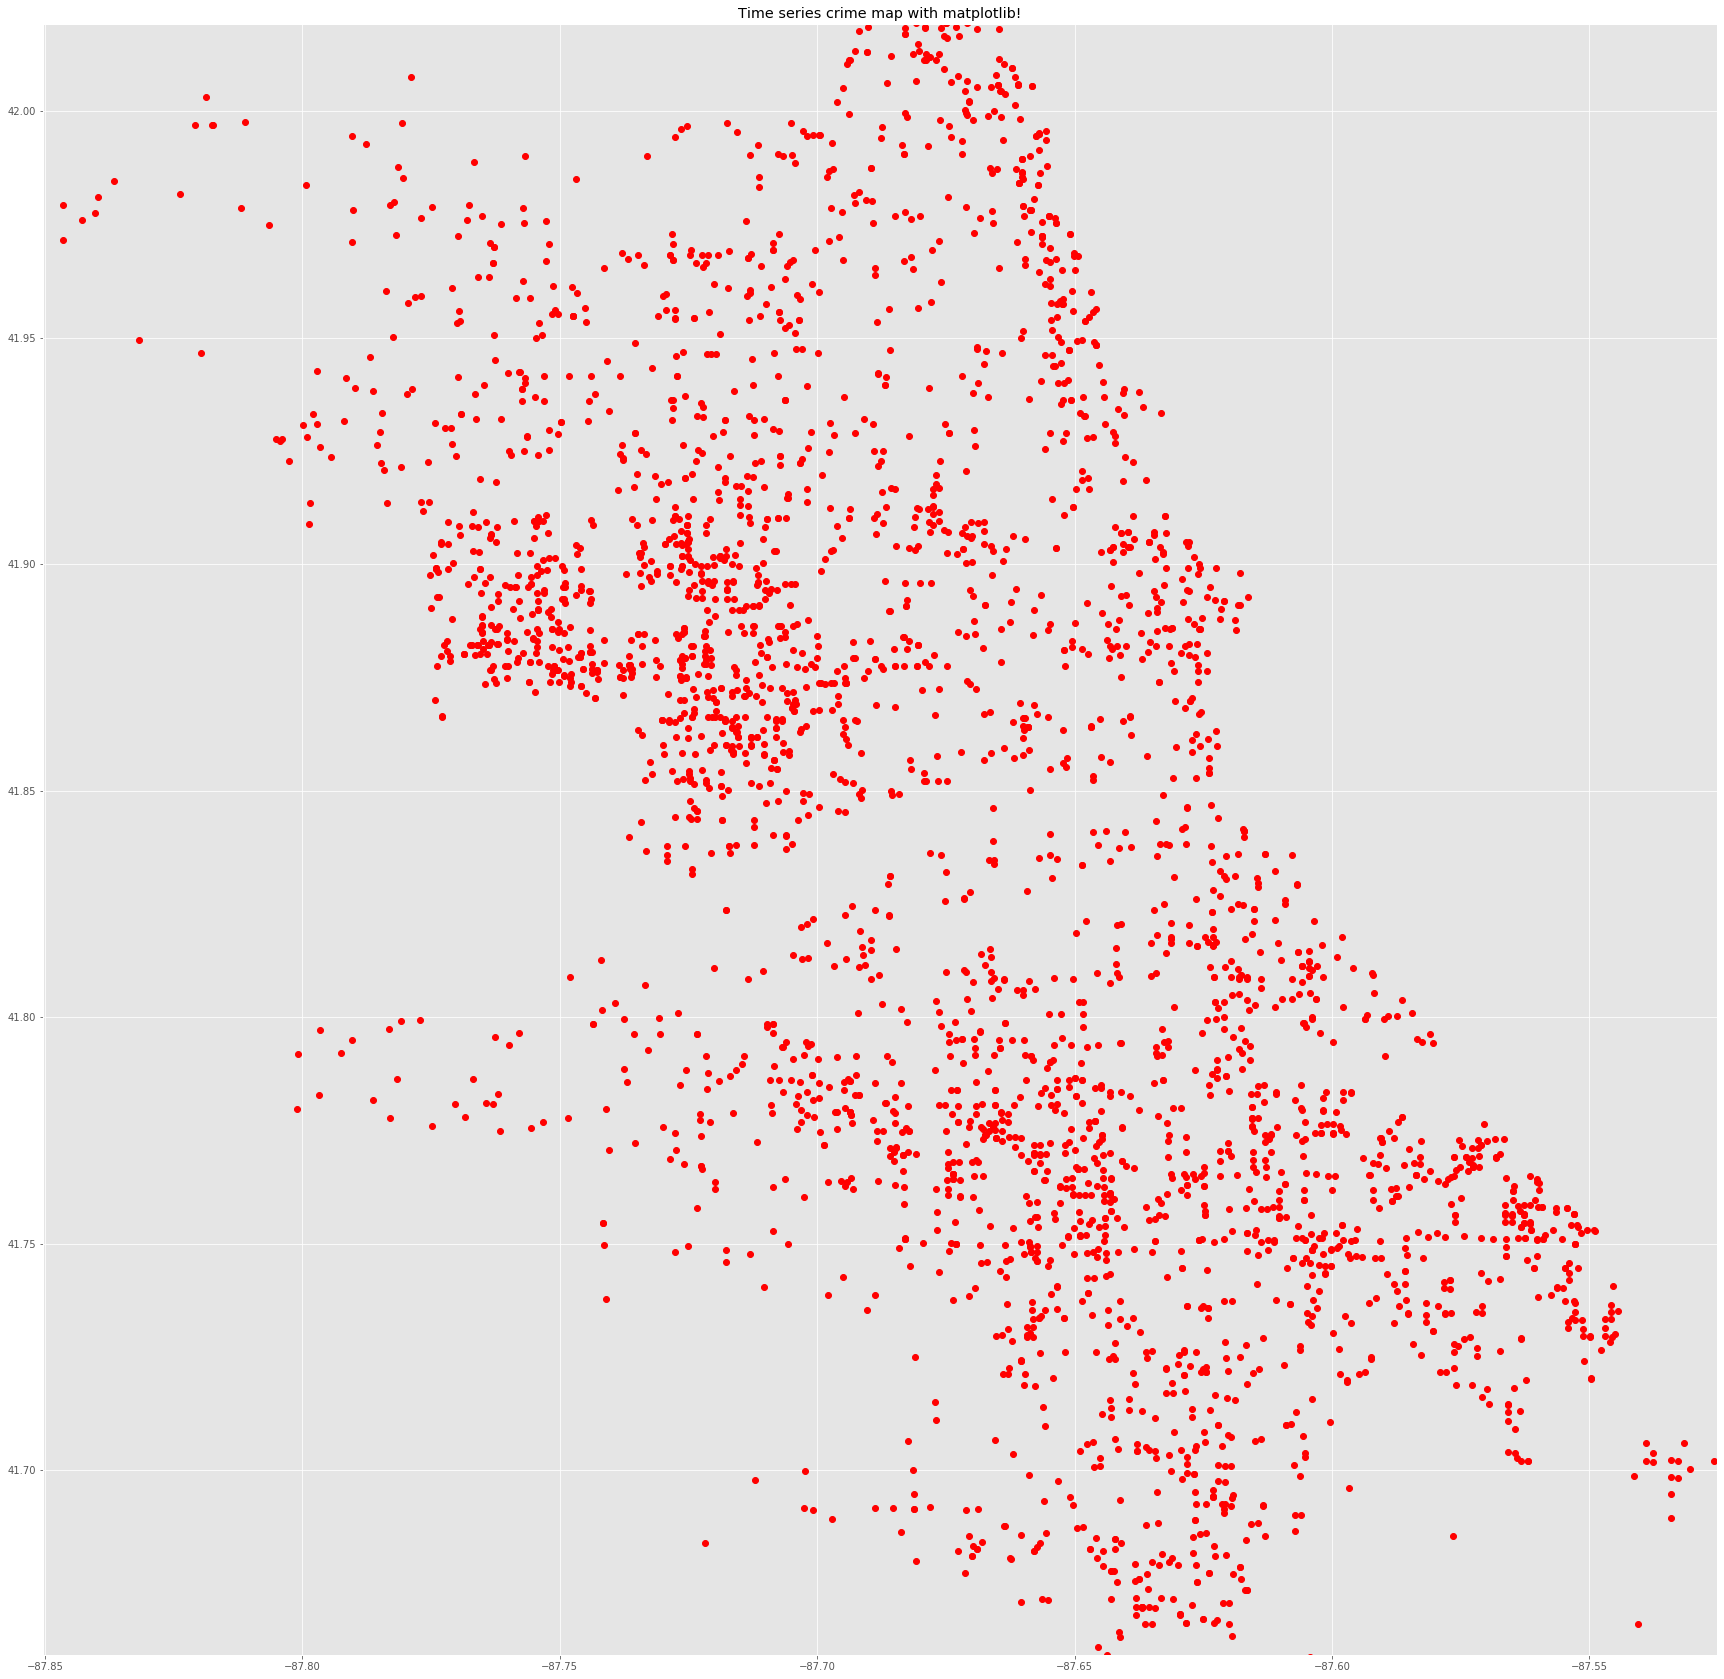

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('ggplot')
mpl.rcParams['agg.path.chunksize'] = 10000
plt.rcParams["figure.figsize"] = [30, 30]

df = map_arr[-1]
xdata = df["longitude"].dropna().to_numpy()
ydata = df["latitude"].dropna().to_numpy()
xlim=(min(xdata), max(xdata)) 
ylim=(min(ydata), max(ydata))


xlim = (-87.85041986215067, -87.52523350043245)
ylim = (41.65924455069546, 42.019245840973895)

print(xlim)
print(ylim)

fig = plt.figure()
#plt.scatter(xdata,ydata)
ax = plt.axes(xlim=xlim, ylim=ylim) 
#ax.set_facecolor((1.0, 0.47, 0.42))
sct, = plt.plot([], [],'o', color='red', lw=2) 

# initialization function 
def init(): 
    # creating an empty plot/frame 
    sct.set_data([], [])
    return sct,

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i):
    df = map_arr[i]
    xdata = df["longitude"].dropna().to_numpy()
    ydata = df["latitude"].dropna().to_numpy()
    sct.set_data(xdata,ydata)
    return sct,

# setting a title for the plot 
plt.title('Time series crime map with matplotlib!') 
# hiding the axis details 
plt.axis('on') 

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=np.arange(0,len(map_arr),1), interval=100, blit=True,repeat=False) 

# save the animation as mp4 video file 
anim.save(CSV_PATH + 'crime_locations_2016-2020.gif', writer='imagemagick') 

#### Covert points into geojson and geopandas compatible geometery

In [ ]:
latest_30_df = map_arr[-1][map_arr[-1]['date'].notnull()]
latest_30_df.head()

In [ ]:
from scipy import stats as st
from scipy.stats import gaussian_kde as gaussian_kde
import numpy as np
from KDEpy import FFTKDE, NaiveKDE


def get_kde( x, y, xmin, xmax, ymin, ymax, xx, yy, positions):

    values = np.array([x, y]).T
    #values = values.reshape(values.shape[1], values.shape[0])
    #print("values is: " + str(values))
    #grid, points = get_kernel(values)
    points = get_kernel(values, positions)
    #kernel.set_bandwidth(bw_method=kernel.factor / 30.)
    f = np.reshape(points, xx.shape)
    #print(points.shape)
    #print(grid)
    #return grid, f
    return f

def get_kernel(data, positions):
    #print(data.shape)
    #print(data)
    estimator = FFTKDE(kernel='gaussian', norm=2, bw=0.001)
    #grid, points = estimator.fit(data, weights=None).evaluate(grid_size)
    points = estimator.fit(data, weights=None).evaluate(positions)
    #grid, points = estimator.fit(data, weights=None).evaluate(grid_size)
    #kernel = gaussian_kde(dataset=values, bw_method="silverman" )
    #return grid, points
    return points

In [ ]:
xbound = (-87.9361,-87.5245)
ybound = (41.6447,42.023)

In [ ]:
grid_size = 500
density_matrix_t_series = []
# Define the borders
x = [-87.9361,-87.5245]
y = [41.6447,42.023]
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY

xx, yy = np.mgrid[xmin:xmax:(grid_size*1j), ymin:ymax:(grid_size*1j)]
positions = np.dstack([xx.ravel(), yy.ravel()])
positions = positions.reshape(positions.shape[1], positions.shape[2])
grid_matrix = positions

In [ ]:
for i, df in enumerate(map_arr):
    if df["longitude"].count() > 400:
        #grid, points = get_kde(df["LONGITUDE"].dropna().to_numpy(), df["LATITUDE"].dropna().to_numpy() , xmin, xmax, ymin, ymax, xx, yy, positions)
        points = get_kde(df["longitude"].dropna().to_numpy(), df["latitude"].dropna().to_numpy() , xmin, xmax, ymin, ymax, xx, yy, positions)
        density_matrix_t_series.append(points)
        print("@" + str(i))

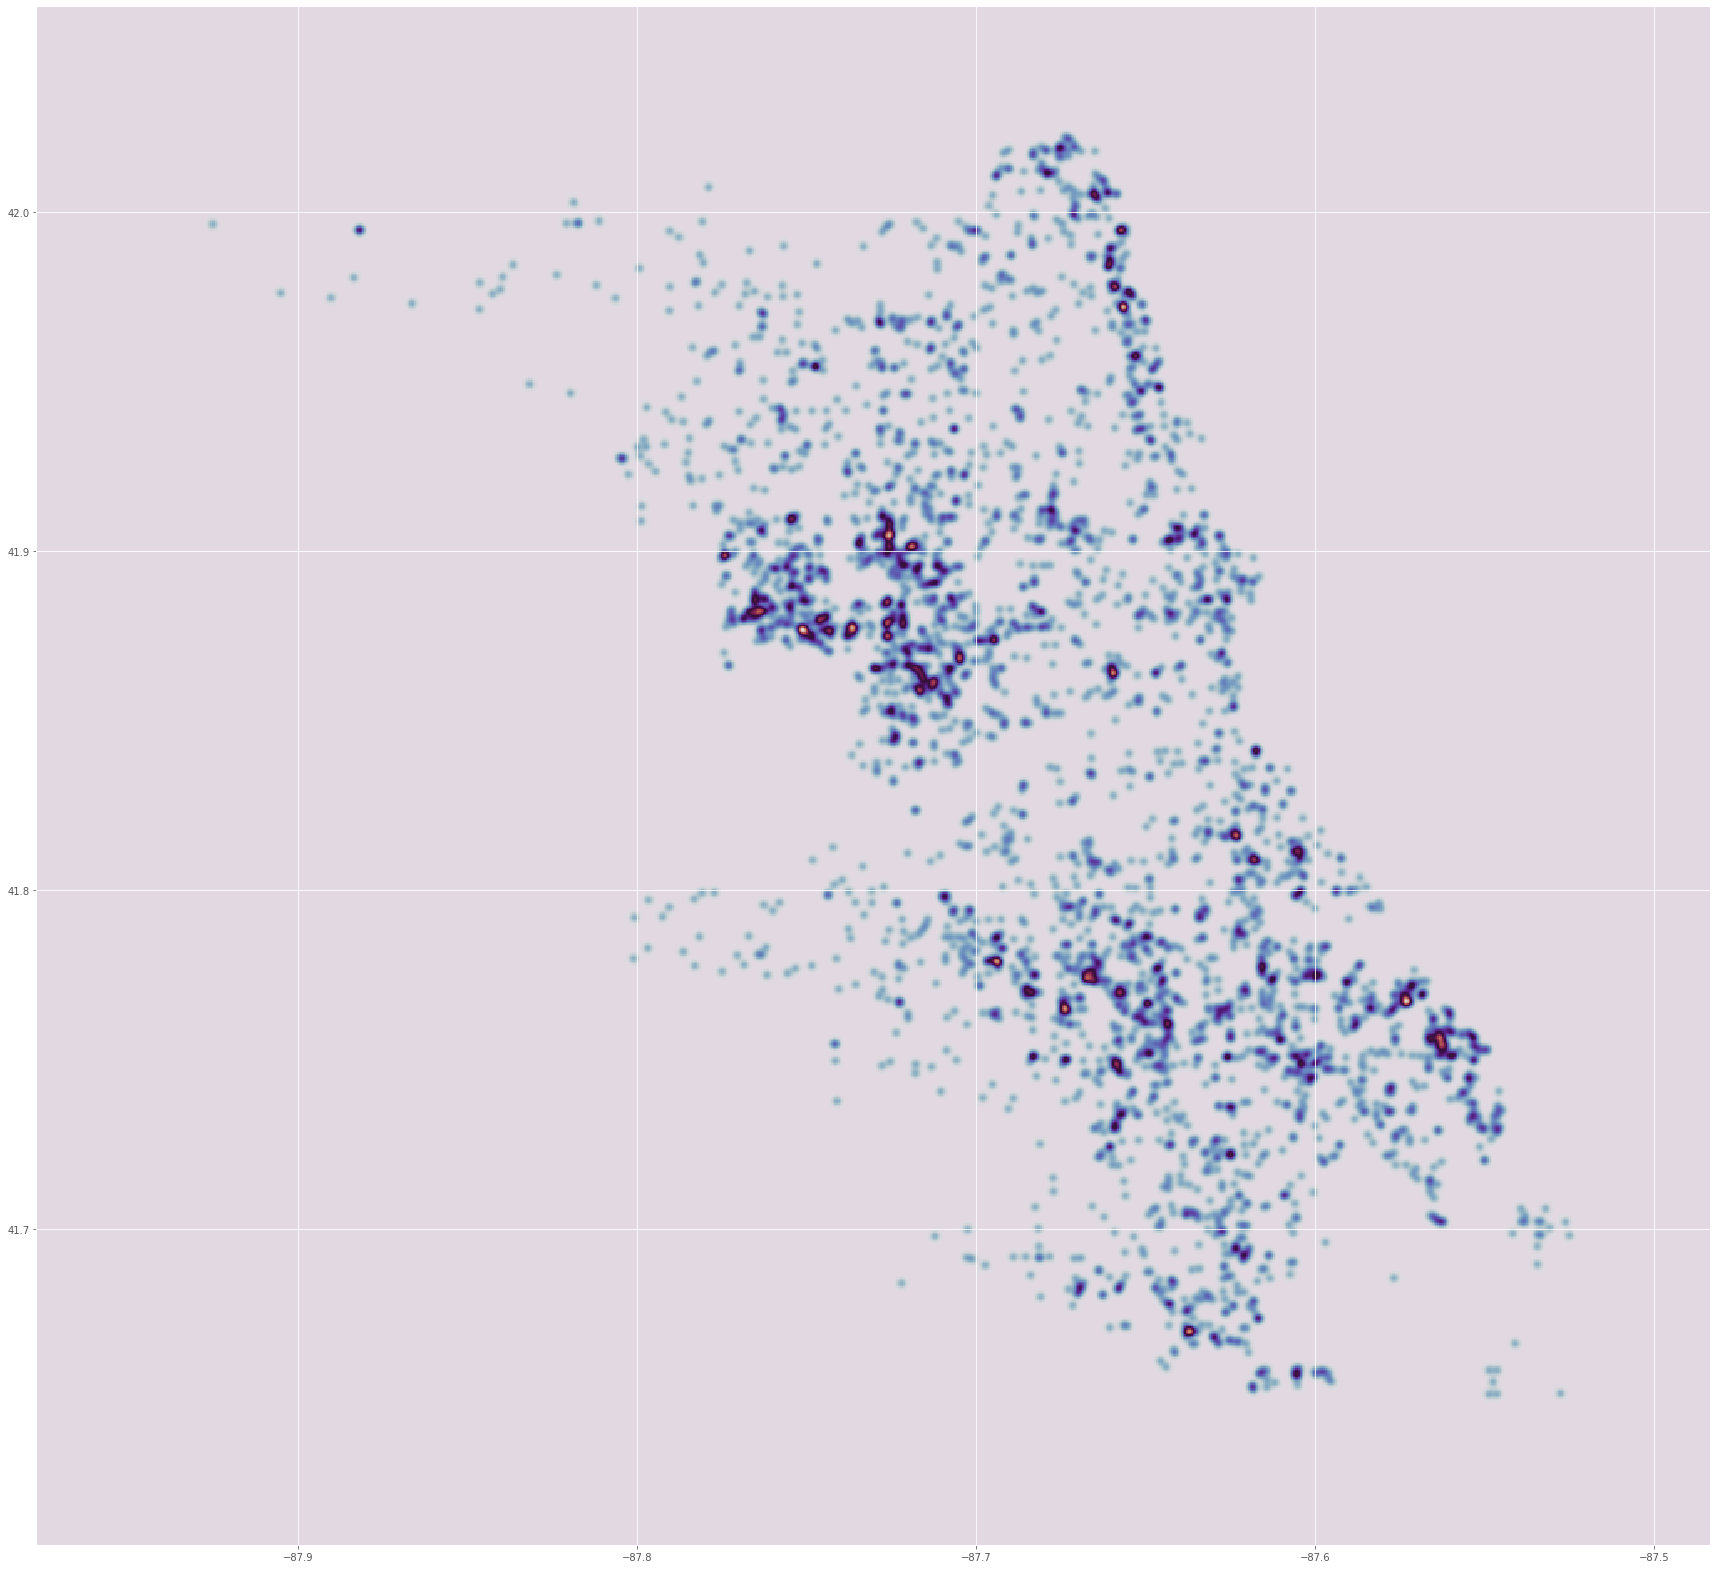

In [30]:
plt.imshow( X=np.rot90(density_matrix_t_series[-1]), cmap=plt.cm.twilight, extent=[xmin, xmax, ymin, ymax])

In [ ]:
density_matrix_t_series[0].shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = StandardScaler()
scaler2 = MinMaxScaler()
dm_series_np = np.array(density_matrix_t_series)
flattened_matrix_np = np.reshape(dm_series_np, (dm_series_np.shape[0]*dm_series_np.shape[1], dm_series_np.shape[1]))

normalized_matrices = scaler.fit_transform(flattened_matrix_np)
normalized_matrices = scaler2.fit_transform(normalized_matrices)

inverseTcheck = scaler2.inverse_transform(normalized_matrices)
inverseTcheck = scaler.inverse_transform(inverseTcheck)

In [ ]:
#This shape is for LSTM model input
#normalized_matrices.shape

In [ ]:
density_matrix_t_series = np.rollaxis(np.dstack(density_matrix_t_series),-1)
density_matrix_t_series.shape

In [ ]:
data2 = density_matrix_t_series
data2.shape

In [ ]:
#data2 = normalized_matrices.reshape((int(normalized_matrices.shape[0]/normalized_matrices.shape[1]), normalized_matrices.shape[1], normalized_matrices.shape[1]))
#data2.shape

In [ ]:
iterable = [np.rot90(matrix) for matrix in data2]

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('ggplot')
mpl.rcParams['agg.path.chunksize'] = 10000

df = map_arr[-1]
xdata = df["longitude"].dropna().to_numpy()
ydata = df["latitude"].dropna().to_numpy()
xlim=(min(xdata), max(xdata)) 
ylim=(min(ydata), max(ydata))

print(xlim)
print(ylim)

plt.rcParams["figure.figsize"] = [30, 30]
fig1, ax1 = plt.subplots()
#ax1.scatter(x="LONGITUDE", y="LATITUDE", data=map_arr[frame_from_latest], c="red", alpha=0.4)
im = plt.imshow( X=iterable[0], cmap=plt.cm.twilight, extent=[xmin, xmax, ymin, ymax])


# initialization function 
def init(): 
    # creating an empty plot/frame
    # print("in init")
    im.set_data(iterable[0])
    return [im]


# animation function 
def animate(i):
    #df = map_arr[i]
    #xdata = df["LONGITUDE"].dropna().to_numpy()
    #ydata = df["LATITUDE"].dropna().to_numpy()
    #np.rot90(data2[i])
    #print("in animate")
    im.set_data(iterable[i])
    return [im]

# setting a title for the plot 
plt.title('Time series crime map with matplotlib!') 
# hiding the axis details 
plt.axis('on') 

# call the animator	 
anim = animation.FuncAnimation(fig1, animate, init_func=init,frames=np.arange(0,np.rot90(data2).shape[1],1), interval=100, blit=True,repeat=False) 

# save the animation as mp4 video file 
anim.save(CSV_PATH + 'crime_zone.gif', writer='imagemagick') 
plt.show()

(-87.925269164, -87.524618154)
(41.651223603000005, 42.022534793)


In [ ]:
import pickle
pickle.dump( density_matrix_t_series, open( CSV_PATH + "density_matrix_t_series.pickle", "wb" ) )